In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
sns.set()

# Week 2: Probability, Bayes' Theorem, Continuous random variables

## Exercise 1

A group of researchers has designed a new inexpensive and
painless test for detecting lung cancer. The test is intended to be an initial screening
test for the population in general. A positive result (presence of lung cancer)
from the test would be followed up immediately with medication, surgery or more
extensive and expensive test. The researchers know from their studies the following
facts:

* Test gives a positive result in 98% of the time when the test subject has lung
cancer.
* Test gives a negative result in 96 % of the time when the test subject does
not have lung cancer.
* In general population approximately one person in 1000 has lung cancer.


We can use the notation:
\begin{align}
H \text{ with values } \mathbb{H}&=\{c, h\} \\
T \text{ with values } \mathbb{T}&=\{pos, neg\}
\end{align}

The random variable $H$ (health status) has possible states: c (cancer), h (healthy). <br/> 
The random variable $T$ (medical test) has possible states: pos (positive), neg (negative)<br/> 
Positive means "Lung cancer detected"

The available info can be summarized as:
\begin{align}
P(c) &= 1\cdot 10^{-3} \\
P(pos|c) &= 0.98 \\
P(neg|h) &= 0.96
\end{align}


In [3]:
p_c = 1e-3 # probability of lug cancer p(c) (prevalence of the disease)
p_pos_st_c = 0.98 # p(pos|c), prob of pos such that c
p_neg_st_h = 0.96 # p(neg|h), prob of neg such that h

* Compute $P(h), P(neg|c), P(pos|h)$. 

    Hint: probabilities sum up to 1.

* Compute $P(c, pos), P(h, pos), P(c, neg), P(h, neg)$. 

    Hint: see definition of joint probability, slide 27 Lecture 2: Bayes' rule.

* Compute $p(pos)$ and $p(neg)$.

    Hints:

    * you already have the joint from previous bullet point and want a marginal. You can use the formulas at slide 34 (or 35) of Lecture 2: Bayes' rule.

    * very similar computation (for Covid test) at slide 42 of Lecture 2: Bayes' rule.

    * probabilities sum up to one. Once you compute $p(pos)$, $p(neg)$ is very easy...

* Compute $P(c|pos)$ and $P(h|pos)$. Comment the results

    Hints:
    * time to apply Bayes' theorem, slide 23 of Lecture 2: Bayes' rule
    * you have already computed numerator/denominator in the previous bullet points

## Exercise 2

 We have three boxes, $a$, $b$, and $c$. There are:
* 2 red balls and 5 white balls in the box $a$
* 4 red balls and 1 white ball in the box $b$
* 1 red ball and 3 white balls in the box $c$.


Consider a random experiment in which one of the boxes is randomly selected and
from that box, one ball is randomly picked up. After observing the color of the
ball it is replaced in the box it came from. Suppose also that on average box $a$ is
selected 40% of the time and box $b$ 10% of the time (i.e. $P(a) = 0.4, P(b)=0.1$).


In [4]:
p_a = 0.4 # probability of picking up box a
p_b = 0.1 # probability of picking up box b
balls = np.array([[2, 5], [4, 1], [1, 3]]); balls # number of balls (columns in the different boxes (rows))

array([[2, 5],
       [4, 1],
       [1, 3]])

* Determine the random variables and fix a notation.

    Hint: take inspiration from the notation in Exercise 1

* What is the probability of picking a red ball? Show all the passages.

Numerical result: $p(r)=0.319285$


* If a red ball was picked, from which box it most probably came from? Show all the passages.

Numerical result: the probabilities of the 3 boxes when a red ball is picked are $[0.35794183, 0.25055928, 0.39149888]$, thus box c is the most probable.


## Exercise 3 (optional)

Assume that on average fraternal twins (two fertilized eggs and then could be of different sex) occur once in 150 births and identical twins (single egg divides into two separate embryos, so both have the same sex) once in
400 births. American male singer-actor Elvis Presley (1935-1977) had a twin brother who died in birth. Assume that an equal number of boys and girls are born on average. What is the probability that Elvis was an identical twin? Show the steps how you derived the equations to compute that probability.

Numerical result: 0.285714

# Continuous random variables & distributions

## Exercise 1

So far we have worked with discrete random variables with a finite set of possible outcomes. Throughout the course, we will work more often with continuous distributions with an infinite set of possible outcomes.

Random sampling from very common distribution (ex standard Gaussian, uniform) is available in `numpy.random`.

* Draw 10000 samples from a standard Gaussian distribution. Generate a histogram and a kernel density estimation plot. Comment the results.

Hint: use `np.random.randn` to sample the points, `plt.hist` for the histogram, `sns.kdeplot` for the kernel density estimation

 * Compare the empirical distribution of the 1000 samples with the theoretical probability density function. 
 
Note the probability density function (pdf) of a random Gaussian variable $x$ is:  
$$f(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}x^2}$$

## Note on scipy.stats

More advanced tools for continuous distributions in `scipy.stats`

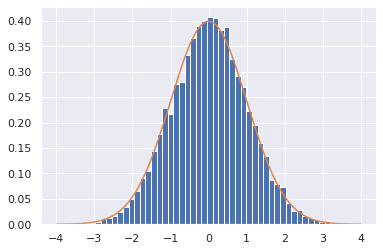

In [5]:
x_range = np.arange(-4, 4, 0.01)
# norm=normal, pdf=probability density function
normal_dist = stats.norm.pdf(x_range, loc=0, scale=1) # loc refers to the mean, scale to the standard deviation
normal_samples = stats.norm.rvs(size=10_000, loc=0, scale=1) # norm=normal, rsv=draw random samples
plt.hist(normal_samples, density=True, bins=50, label="Samples")
plt.plot(x_range, normal_dist);

`scipy.stats` has a convenient object-oriented interface to represent random variables. Convenient to specify distribution parameters only once...

In [6]:
normal_var = stats.norm(loc=4, scale=2) # object representing the normal distribution, with mean 4 and std 2.
# normal_var.pdf, probability density function
# normal_var.cdf, cumulative density function
# normal_var.rsv, draw random samples from the distribution 
# normal_var.logpdf, logarithm of pdf (often more useful than the pdf in practice)

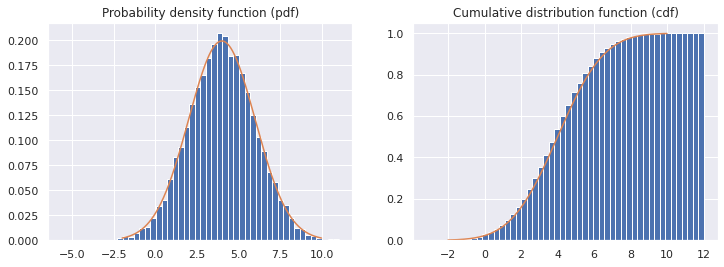

In [7]:
x_range = np.arange(-2, 10, 0.01)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].set_title("Probability density function (pdf)")
ax[0].hist(normal_var.rvs(10_000), density=True, bins=50)
ax[0].plot(x_range, normal_var.pdf(x_range))
ax[1].set_title("Cumulative distribution function (cdf)")
ax[1].hist(normal_var.rvs(10_000), density=True, bins=50, cumulative=True)
ax[1].plot(x_range, normal_var.cdf(x_range));

`scipy.stats` has support for many more random variables, such as the common beta distribution:

In [8]:
beta_var = stats.beta(a=20, b=10)

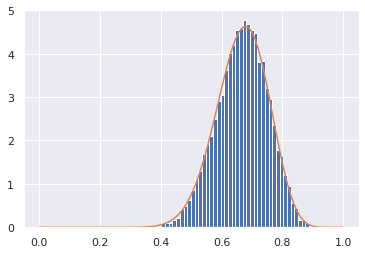

In [9]:
theta_range = np.linspace(0, 1, 100)
plt.hist(beta_var.rvs(10_000), density=True, bins=50, label="Samples")
plt.plot(theta_range, beta_var.pdf(theta_range), label="pdf");